Starting with the basics, we imported the libraries and datasets. The main aim was to analyse the dataset, and the attributes so that effective visuals could be created.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt


IMPORTING WHO ALCOHOL DATA LATEST


Dataset:

Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

[Link to Dataset](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/alcohol-recorded-per-capita-(15-)-consumption-(in-litres-of-pure-alcohol))

In [3]:
alc_cons_who = pd.read_csv('/content/who worldwide alc consumption data.csv')

In [4]:
alc_cons_who.head(10)

,Country,All types,Beer,Other alcoholic beverages,Spirits,Wine
0,Afghanistan,0.01,0.00,0.00,0.01,0.00
1,Albania,4.40,1.75,0.08,1.43,1.15
2,Algeria,0.59,0.31,0.00,0.08,0.20
3,Andorra,10.99,3.59,0.00,2.32,4.98
4,Angola,5.84,3.78,0.08,1.27,0.72
5,Antigua and Barbuda,11.88,2.97,0.41,4.55,3.95
6,Argentina,7.95,3.62,0.72,0.72,2.88
7,Armenia,3.77,0.52,0.01,2.78,0.46
8,Australia,9.51,3.71,0.81,1.32,3.67
9,Austria,11.90,6.30,0.00,1.90,3.70


Checking for the distribution of the alcohol consumption attribute

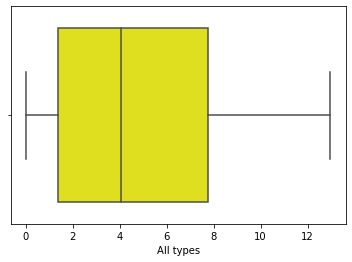

In [5]:
sns.boxplot(data=alc_cons_who,x='All types',color='yellow')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


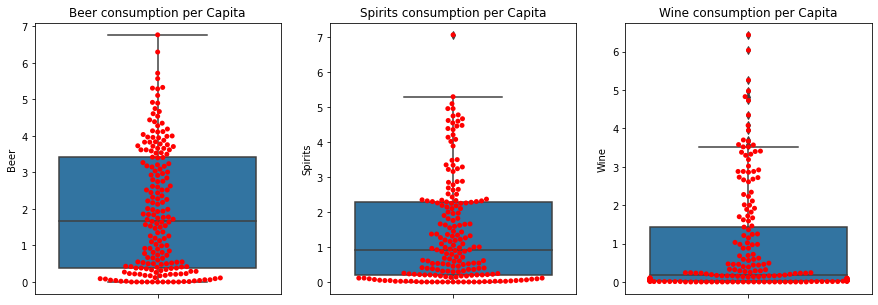

In [6]:
fig,axes = plt.subplots(ncols=3,figsize=(15,5))
sns.boxplot(y=alc_cons_who['Beer'],ax=axes[0]).set_title('Beer consumption per Capita')
sns.swarmplot(y=alc_cons_who['Beer'],ax=axes[0],color='red')
sns.boxplot(y=alc_cons_who['Spirits'],ax=axes[1]).set_title('Spirits consumption per Capita')
sns.swarmplot(y=alc_cons_who['Spirits'],ax=axes[1],color='red')
sns.boxplot(y=alc_cons_who['Wine'],ax=axes[2]).set_title('Wine consumption per Capita')
sns.swarmplot(y=alc_cons_who['Wine'],ax=axes[2],color='red')

In [8]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 35.7 MB/s 
     |████████████████████████████████| 15.4 MB 13.8 MB/s 


In [10]:
import geopandas as gpd
shapefile = '/content/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [11]:
print(gdf[gdf['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

        country country_code                                           geometry
159  Antarctica          ATA  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...


In [12]:
merged = gdf.merge(alc_cons_who, left_on = 'country', right_on = 'Country')

In [51]:
merged.head()

,country,country_code,geometry,Country,All types,Beer,Other alcoholic beverages,Spirits,Wine
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2.71,1.64,0.0,0.79,0.29
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",United Republic of Tanzania,7.81,0.74,6.6,0.38,0.09
2,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,8.00,3.50,0.4,2.10,2.00
3,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,8.93,3.97,0.0,3.29,1.67
4,Kazakhstan,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,3.73,2.52,0.0,1.05,0.16


In [55]:
import plotly.express as px

In [72]:
fig = px.choropleth(merged,
                    locations='country_code',
                    color='All types',
                    color_continuous_scale='spectral_r',
                    hover_name='Country',
                    
                    #labels={'Cost per capita ($)':'Total Cost per capita in $'
                    )

fig.update_layout(title={'text':'All tyes of Alcohol Consumption',
                         'xanchor':'center',
                        'yanchor':'top',
                        'x':0})
fig.show()

In [73]:
fig = px.choropleth(merged,
                    locations='country_code',
                    color='Beer',
                    color_continuous_scale='spectral_r',
                    hover_name='Country',
                    
                    #labels={'Cost per capita ($)':'Total Cost per capita in $'
                    )

fig.update_layout(title={'text':'Beer Consumption',
                         'xanchor':'center',
                        'yanchor':'top',
                        'x':0})
fig.show()

In [74]:
fig = px.choropleth(merged,
                    locations='country_code',
                    color='Wine',
                    color_continuous_scale='spectral_r',
                    hover_name='Country',
                    
                    #labels={'Cost per capita ($)':'Total Cost per capita in $'
                    )

fig.update_layout(title={'text':'Wine Consumption',
                         'xanchor':'center',
                        'yanchor':'top',
                        'x':0})
fig.show()

In [75]:
fig = px.choropleth(merged,
                    locations='country_code',
                    color='Spirits',
                    color_continuous_scale='spectral_r',
                    hover_name='Country',
                    
                    #labels={'Cost per capita ($)':'Total Cost per capita in $'
                    )

fig.update_layout(title={'text':'Spirits Consumption',
                         'xanchor':'center',
                        'yanchor':'top',
                        'x':0})
fig.show()

# US ACCIDENTS- ALCOHOL RELATED ANALYSIS

Dataset Link :
 https://www.nhtsa.gov/file-downloads?p=nhtsa/downloads/FARS/2019/National/
 

In [16]:
accid_df = pd.read_csv('/content/accident_us.CSV', encoding= 'unicode_escape')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (40,42,69) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
accid_df.head()

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,COUNTY,COUNTYNAME,CITY,CITYNAME,DAY,DAYNAME,MONTH,MONTHNAME,YEAR,DAY_WEEK,DAY_WEEKNAME,HOUR,HOURNAME,MINUTE,MINUTENAME,NHS,NHSNAME,ROUTE,ROUTENAME,TWAY_ID,TWAY_ID2,RUR_URB,RUR_URBNAME,FUNC_SYS,FUNC_SYSNAME,RD_OWNER,RD_OWNERNAME,MILEPT,MILEPTNAME,LATITUDE,...,RELJCT2,RELJCT2NAME,TYP_INT,TYP_INTNAME,WRK_ZONE,WRK_ZONENAME,REL_ROAD,REL_ROADNAME,LGT_COND,LGT_CONDNAME,WEATHER1,WEATHER1NAME,WEATHER2,WEATHER2NAME,WEATHER,WEATHERNAME,SCH_BUS,SCH_BUSNAME,RAIL,RAILNAME,NOT_HOUR,NOT_HOURNAME,NOT_MIN,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR
0,1,Alabama,10001,2,2,0,0,3,3,0,81,LEE (81),2340,OPELIKA,7,7,2,February,2019,5,Thursday,12,12:00pm-12:59pm,54,54,1,This section IS ON the NHS,1,Interstate,I-85,NaN,2,Urban,1,Interstate,1,State Highway Agency,641,641,32.666222,...,1,Non-Junction,1,Not an Intersection,0,None,1,On Roadway,1,Daylight,1,Clear,0,No Additional Atmospheric Conditions,1,Clear,0,No,0,Not Applicable,12,12:00pm-12:59pm,59,59,13,1:00pm-1:59pm,9,9,13,1:00pm-1:59pm,27,27,0,None,0,None,0,None,1,1
1,1,Alabama,10002,2,2,0,0,2,2,0,55,ETOWAH (55),1280,GADSDEN,23,23,1,January,2019,4,Wednesday,18,6:00pm-6:59pm,3,3,1,This section IS ON the NHS,1,Interstate,I-759,NaN,2,Urban,1,Interstate,1,State Highway Agency,15,15,33.997828,...,1,Non-Junction,1,Not an Intersection,0,None,1,On Roadway,2,Dark - Not Lighted,2,Rain,0,No Additional Atmospheric Conditions,2,Rain,0,No,0,Not Applicable,18,6:00pm-6:59pm,3,3,18,6:00pm-6:59pm,7,7,99,Unknown,99,Unknown EMS Hospital Arrival Time,0,None,0,None,0,None,1,0
2,1,Alabama,10003,3,3,0,0,4,4,0,29,CLEBURNE (29),0,NOT APPLICABLE,22,22,1,January,2019,3,Tuesday,19,7:00pm-7:59pm,0,0,1,This section IS ON the NHS,1,Interstate,I-20,NaN,1,Rural,1,Interstate,1,State Highway Agency,2118,2118,33.660842,...,1,Non-Junction,1,Not an Intersection,0,None,1,On Roadway,2,Dark - Not Lighted,10,Cloudy,0,No Additional Atmospheric Conditions,10,Cloudy,0,No,0,Not Applicable,19,7:00pm-7:59pm,2,2,19,7:00pm-7:59pm,12,12,20,8:00pm-8:59pm,5,5,14,"Motor Vehicle struck by falling cargo,or somet...",0,None,0,None,1,0
3,1,Alabama,10004,1,1,0,1,1,1,1,55,ETOWAH (55),2562,RAINBOW CITY,22,22,1,January,2019,3,Tuesday,3,3:00am-3:59am,15,15,1,This section IS ON the NHS,1,Interstate,I-59,NaN,1,Rural,1,Interstate,1,State Highway Agency,1775,1775,33.956472,...,1,Non-Junction,1,Not an Intersection,0,None,1,On Roadway,2,Dark - Not Lighted,1,Clear,0,No Additional Atmospheric Conditions,1,Clear,0,No,0,Not Applicable,3,3:00am-3:59am,4,4,3,3:00am-3:59am,11,11,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),0,None,0,None,0,None,1,0
4,1,Alabama,10005,1,1,0,0,1,1,0,3,BALDWIN (3),0,NOT APPLICABLE,18,18,1,January,2019,6,Friday,5,5:00am-5:59am,50,50,1,This section IS ON the NHS,1,Interstate,I-10,NaN,2,Urban,1,Interstate,1,State Highway Agency,413,413,30.656269,...,1,Non-Junction,1,Not an Intersection,0,None,4,On Roadside,2,Dark - Not Lighted,5,"Fog, Smog, Smoke",0,No Additional Atmospheric Conditions,5,"Fog, Smog, Smoke",0,No,0,Not Applicable,99,Unknown,99,Unknown,6,6:00am-6:59am,0,0,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),0,None,0,None,0,None,1,1


In [18]:
accid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33244 entries, 0 to 33243
Data columns (total 91 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATE         33244 non-null  int64  
 1   STATENAME     33244 non-null  object 
 2   ST_CASE       33244 non-null  int64  
 3   VE_TOTAL      33244 non-null  int64  
 4   VE_FORMS      33244 non-null  int64  
 5   PVH_INVL      33244 non-null  int64  
 6   PEDS          33244 non-null  int64  
 7   PERSONS       33244 non-null  int64  
 8   PERMVIT       33244 non-null  int64  
 9   PERNOTMVIT    33244 non-null  int64  
 10  COUNTY        33244 non-null  int64  
 11  COUNTYNAME    33244 non-null  object 
 12  CITY          33244 non-null  int64  
 13  CITYNAME      33244 non-null  object 
 14  DAY           33244 non-null  int64  
 15  DAYNAME       33244 non-null  int64  
 16  MONTH         33244 non-null  int64  
 17  MONTHNAME     33244 non-null  object 
 18  YEAR          33244 non-nu

Here, we identify the important columns as:




*   STATENAME

*   STATE

*   MONTH

*   MONTHNAME
*   HOUR

*   ROUTENAME
*   LATITUDE

*   LONGITUD
*   WEATHER1NAME

*   DRUNK_DR













In [19]:
accid_df.drop(accid_df.columns.difference(['STATENAME','STATE','MONTH','MONTHNAME', 'HOUR', 'ROUTENAME', 'LATITUDE', 'LONGITUD', 'WEATHER1NAME', 'DRUNK_DR']), 1, inplace=True)

In [20]:
accid_df.head(29)

,STATE,STATENAME,MONTH,MONTHNAME,HOUR,ROUTENAME,LATITUDE,LONGITUD,WEATHER1NAME,DRUNK_DR
0,1,Alabama,2,February,12,Interstate,32.666222,-85.336658,Clear,1
1,1,Alabama,1,January,18,Interstate,33.997828,-86.053997,Rain,0
2,1,Alabama,1,January,19,Interstate,33.660842,-85.391011,Cloudy,0
3,1,Alabama,1,January,3,Interstate,33.956472,-86.140522,Clear,0
4,1,Alabama,1,January,5,Interstate,30.656269,-87.809461,"Fog, Smog, Smoke",1
5,1,Alabama,1,January,12,Interstate,32.183306,-86.424683,Clear,0
6,1,Alabama,1,January,9,Interstate,34.012775,-86.074814,Cloudy,0
7,1,Alabama,2,February,21,County Road,31.068686,-85.333658,Clear,1
8,1,Alabama,2,February,7,Local Street - Municipality,30.279125,-87.677108,Clear,0
9,1,Alabama,2,February,5,Local Street - Municipality,32.344300,-86.317081,Clear,0


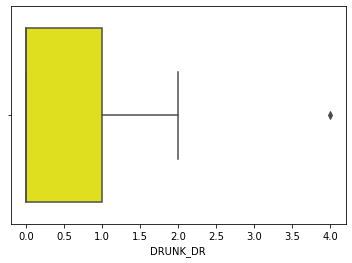

In [21]:
sns.boxplot(data=accid_df,x='DRUNK_DR',color='yellow')

Here, we see that there are certain outliers in the DRUNK_DR attribute, which should ideally be 1 and 0 only.
We drop them and clean the data.

count of values other than 1 and 0 in drunk_dr attribute

In [22]:
accid_df['DRUNK_DR'].value_counts()

0    24833
1     8161
2      249
4        1
Name: DRUNK_DR, dtype: int64

Since there are very less number of unknown data, we can consider it as outliers and drop from the data

In [23]:
accid_df.drop(accid_df.loc[accid_df['DRUNK_DR']==4].index, inplace=True)
accid_df.drop(accid_df.loc[accid_df['DRUNK_DR']==2].index, inplace=True)

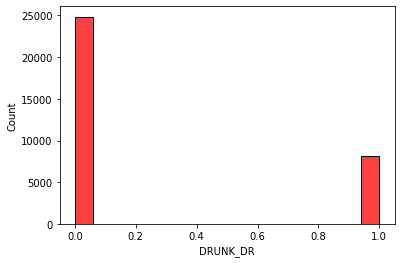

In [24]:
sns.histplot(data=accid_df,x='DRUNK_DR',color='red')

Now, we only have the dataset which contains only the correct attribute values.

Lets visualize this data.

In [25]:
y1 = accid_df[accid_df['DRUNK_DR']==0].groupby('STATENAME').size()
y2 = accid_df[accid_df['DRUNK_DR']==1].groupby('STATENAME').size()
x = accid_df['STATENAME'].unique()
sn = accid_df['STATE'].unique()


In [26]:
df_piv = pd.DataFrame({'STATENAME':x,'STATE':sn,'not_drunk':y1,'drunk':y2})
df_piv.reset_index(drop=True, inplace=True)
df_piv.head()

,STATENAME,STATE,not_drunk,drunk
0,Alabama,1,631,220
1,Alaska,2,40,20
2,Arizona,4,714,190
3,Arkansas,5,345,120
4,California,6,2493,802


Here, we notice that since the states in the united differe in the population, we cannot compare the statistics based on value counts of number of alcohol influenced accidents.

Thus, we calculate the percentage of accidents which are under the influence of alcohol of the total number of accidents in each state, and use this attribute to analyse the data.

In [27]:
df_piv['perc_drunk'] = df_piv['drunk']/(df_piv['drunk']+df_piv['not_drunk'])
df_piv.head()

,STATENAME,STATE,not_drunk,drunk,perc_drunk
0,Alabama,1,631,220,0.258519
1,Alaska,2,40,20,0.333333
2,Arizona,4,714,190,0.210177
3,Arkansas,5,345,120,0.258065
4,California,6,2493,802,0.243399


In [28]:
piv_accid_df = pd.read_csv('/content/accident_us_pivot.CSV', encoding= 'unicode_escape')

In [29]:
piv_accid_df.sort_values(by = 'perc_drunk', ascending=False,inplace=True)

In [30]:
piv_accid_df['perc_drunk'] = piv_accid_df['perc_drunk'] *100

In [31]:
piv_accid_df = df_piv
piv_accid_df.sort_values(by = 'perc_drunk', ascending=False,inplace=True)
piv_accid_df.head(5)

,STATENAME,STATE,not_drunk,drunk,perc_drunk
39,Rhode Island,44,23,28,0.549020
26,Montana,30,96,69,0.418182
34,North Dakota,38,54,37,0.406593
47,Washington,53,314,174,0.356557
12,Idaho,16,129,71,0.355000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top 10 States with highest percentage of Alcohol related Accidents')

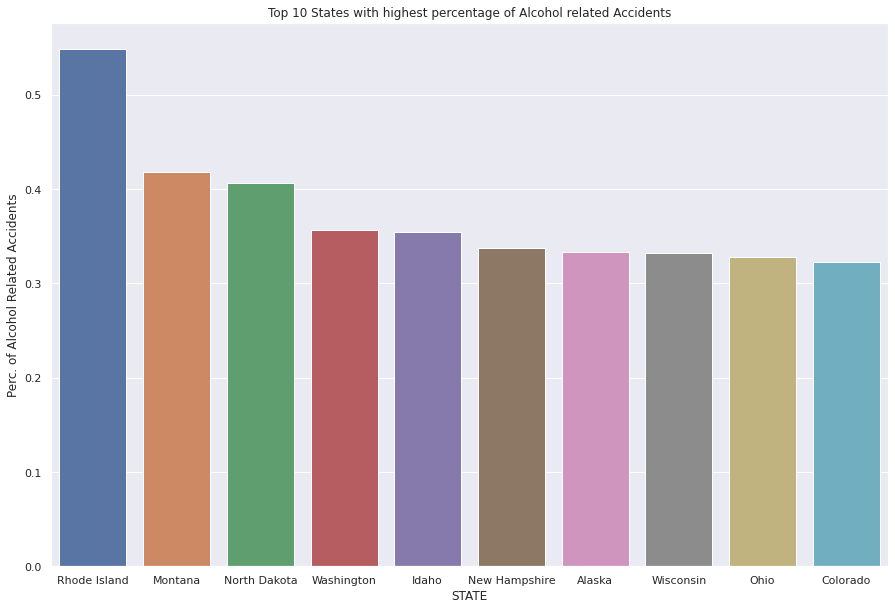

In [32]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.barplot(piv_accid_df['STATENAME'][:10],piv_accid_df['perc_drunk'][:10])
plt.xlabel("STATE")
plt.ylabel("Perc. of Alcohol Related Accidents")
plt.title("Top 10 States with highest percentage of Alcohol related Accidents")

In [33]:
!pip install --upgrade plotly

     |████████████████████████████████| 25.3 MB 61.8 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


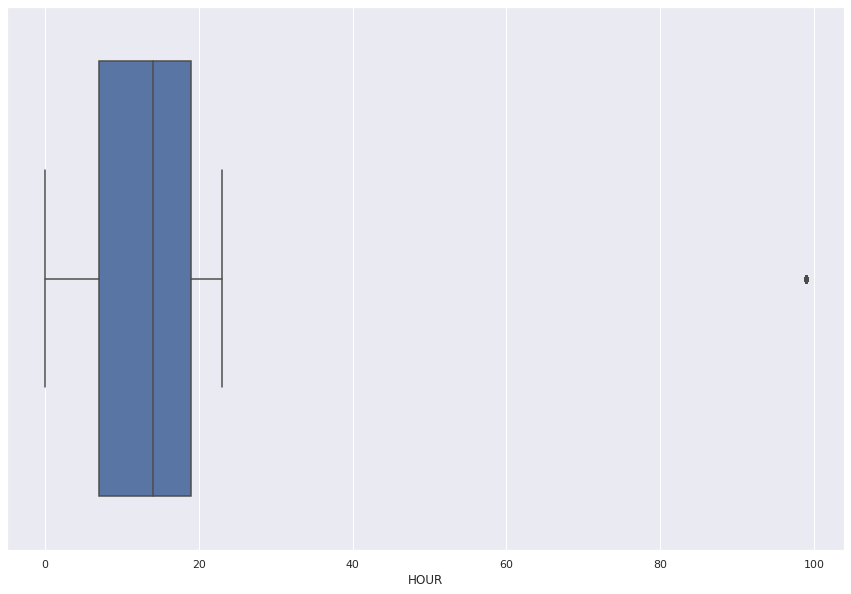

In [34]:
sns.boxplot(accid_df['HOUR'])

Here, we notice that the Hourly data attribute has an outlier with the value outside the possiblt time range. 

We delete this row and clean our data.

In [35]:
accid_df.drop(accid_df.loc[accid_df['HOUR']>23].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


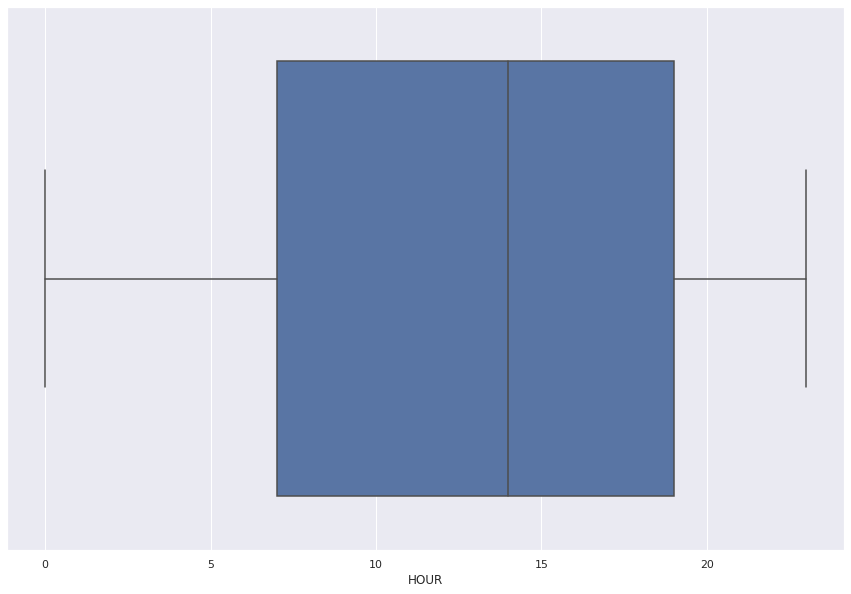

In [36]:
sns.boxplot(accid_df['HOUR'])

Now, our data is more efficient and without outliers.

In [37]:
h1 = accid_df[accid_df['DRUNK_DR']==1].groupby('HOUR').size()
h0 = accid_df[accid_df['DRUNK_DR']==0].groupby('HOUR').size()
h1

HOUR
0     559
1     603
2     591
3     382
4     257
5     206
6     173
7     168
8      90
9      69
10     79
11    104
12    137
13    186
14    217
15    268
16    303
17    352
18    471
19    533
20    526
21    577
22    586
23    624
dtype: int64

Lets plot this value in an efficient visualization

In [38]:
np.linspace(0,23, num  = 24).astype('int')

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

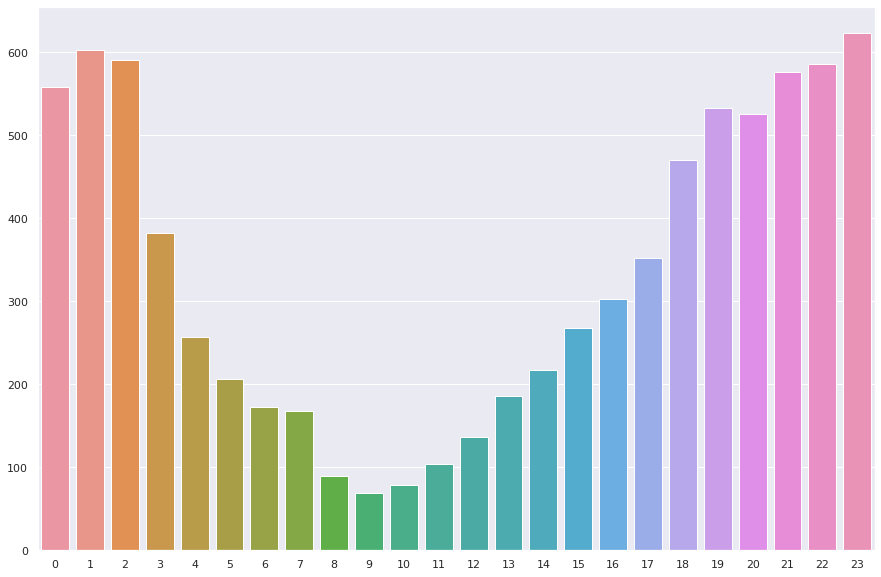

In [39]:
sns.barplot(x = np.linspace(0,23, num  = 24).astype('int'), y = h1)

Plotting Alcohol Influenced and Non-Alcohol Influenced Accidents in a radial chart

In [40]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
  r=h1,
  theta=np.linspace(0,23, num  = 24).astype('int').astype('str'),
  fill='toself',
))
fig.add_trace(go.Scatterpolar(
  r=h0,
  theta=np.linspace(0,23, num  = 24).astype('int').astype('str'),
  fill='toself',
))
fig.update_traces(mode="markers", marker=dict(line_color='white', opacity=0.7))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True),
    
      radialaxis_tickfont_size = 8,
      angularaxis = dict(
        tickfont_size=8,
        rotation=90, # start position of angular axis
        direction="clockwise"
      )
  ),
  showlegend=False
)

fig.show()

Here,we notice that one cannot clearly differentiate between the variance in alcohol related and unrelated changes by the hour due to the the scale being fr away.

To improve this, we can normalise the data with the mean becoming zero and the variance becoming one. 

This will make the visualization better to understand. We can notice the change when one increases and the other decreases.

In [41]:
h0 = accid_df[accid_df['DRUNK_DR']==0].groupby('HOUR').size()
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatterpolar(
  r=(h0 - h0.mean(axis=0)) / h0.std(axis=0),
  theta=np.linspace(0,23, num  = 24).astype('int').astype('str'),
  fill='toself',
))
fig.add_trace(go.Scatterpolar(
  r=(h1 - h1.mean(axis=0)) / h1.std(axis=0),
  theta=np.linspace(0,23, num  = 24).astype('int').astype('str'),
  fill='toself',
))
fig.update_traces(mode="markers", marker=dict(line_color='white', opacity=0.7))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True),
    
      radialaxis_tickfont_size = 8,
      angularaxis = dict(
        tickfont_size=8,
        rotation=90, # start position of angular axis
        direction="clockwise"
      )
  ),
  showlegend=False
)

fig.show()

In the above plot, we see that most of the accidents which occur later in the night are the ones caused under the influence of alcohol. And a larger share of accidents which are not cused under the influence of alcohol occur either very early in the morning, when the pperson is not fully awake or under a hurry, or during the evening, when the pperson is usually tired. But, this reason might also be biases, since more number of vehicles run during the evenings than durin the afternoons, hence the chances of accidents would also increase.

PLOTTING STATEWISE DENSITY ON MAP

In [42]:
import altair as alt
from vega_datasets import data
airports = data.airports()
airports.head()

,iata,name,city,state,country,latitude,longitude
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [43]:
states = alt.topo_feature(data.us_10m.url, feature='states')
airports = piv_accid_df
airports.sort_values(by = 'STATENAME').head(2)

,STATENAME,STATE,not_drunk,drunk,perc_drunk
0,Alabama,1,631,220,0.258519
1,Alaska,2,40,20,0.333333


In [44]:
list(piv_accid_df.columns)

['STATENAME', 'STATE', 'not_drunk', 'drunk', 'perc_drunk']

In [45]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')

variable_list = ['perc_drunk']

alt.Chart(states).mark_geoshape().encode(
    color='perc_drunk:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(piv_accid_df, 'STATE', list(piv_accid_df.columns))
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

alt.Chart(...)

ANALYSING INFLUENCE OF ROUTES AND ITS IMPACT IN ALCOHOL RELATED ACCIDENTS.





In [46]:
accid_df

,STATE,STATENAME,MONTH,MONTHNAME,HOUR,ROUTENAME,LATITUDE,LONGITUD,WEATHER1NAME,DRUNK_DR
0,1,Alabama,2,February,12,Interstate,32.666222,-85.336658,Clear,1
1,1,Alabama,1,January,18,Interstate,33.997828,-86.053997,Rain,0
2,1,Alabama,1,January,19,Interstate,33.660842,-85.391011,Cloudy,0
3,1,Alabama,1,January,3,Interstate,33.956472,-86.140522,Clear,0
4,1,Alabama,1,January,5,Interstate,30.656269,-87.809461,"Fog, Smog, Smoke",1
...,...,...,...,...,...,...,...,...,...,...
33239,56,Wyoming,9,September,18,Unknown,44.354406,-104.810853,Severe Crosswinds,0
33240,56,Wyoming,9,September,13,State Highway,41.167136,-105.887706,Clear,0
33241,56,Wyoming,9,September,15,State Highway,44.912142,-107.104503,Clear,1
33242,56,Wyoming,9,September,4,U.S. Highway,41.403750,-104.456917,Clear,1


In [47]:
ry1 = accid_df[accid_df['DRUNK_DR']==1].groupby('ROUTENAME').size()
ry1

ROUTENAME
County Road                     1424
Interstate                       919
Local Street - Frontage Road      63
Local Street - Municipality     1173
Local Street - Township          281
Other                            354
State Highway                   2254
U.S. Highway                    1137
Unknown                          456
dtype: int64

In [48]:
rx1 = accid_df['ROUTENAME'].sort_values().unique()
rx1


array(['County Road', 'Interstate', 'Local Street - Frontage Road',
       'Local Street - Municipality', 'Local Street - Township', 'Other',
       'State Highway', 'U.S. Highway', 'Unknown'], dtype=object)

In [49]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



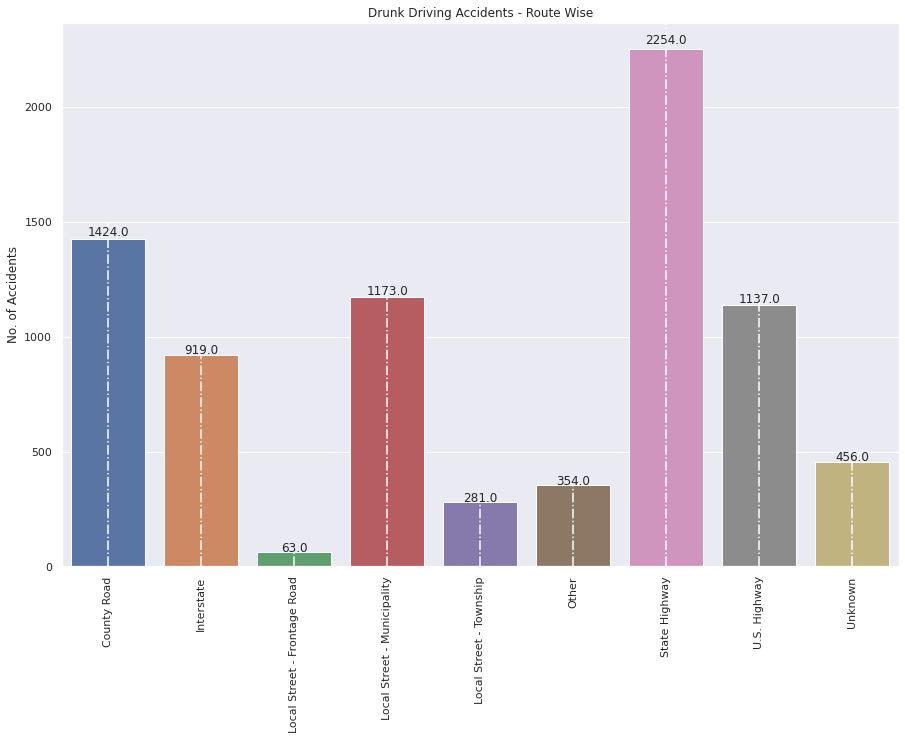

In [50]:
graph = sns.barplot(rx1,ry1)
for i in range(len(rx1)):
  graph.axvline(i,ymin = 0,ymax=ry1[i]/max(ry1),linestyle = '-.', color = 'white')
  
show_values(graph)
plt.xticks(rotation=90)
plt.title('Drunk Driving Accidents - Route Wise')
plt.ylabel('No. of Accidents')
plt.show()

In [54]:
%%shell
jupyter nbconvert --to html /content/Data_Viz_Project.ipynb

[NbConvertApp] Converting notebook /content/Data_Viz_Project.ipynb to html
[NbConvertApp] Writing 2597505 bytes to /content/Data_Viz_Project.html
